<a href="https://colab.research.google.com/github/jelaenas/CESISTA-KJ-DSC1107/blob/main/CESISTA%2C_KJ_FA1_GROUP_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.6
✔ forcats   1.0.1     ✔ stringr   1.6.0
✔ ggplot2   4.0.1     ✔ tibble    3.3.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.2
✔ purrr     1.2.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


# **LECTURE 2**

**Recall this plot**

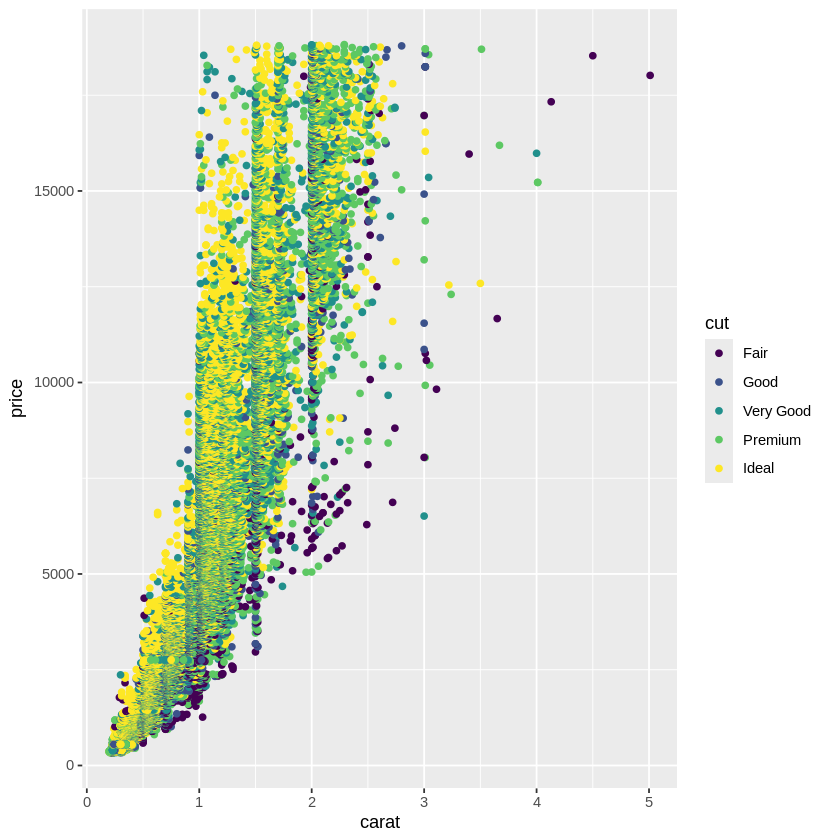

In [2]:
ggplot(data = diamonds) +
  geom_point(mapping = aes(x = carat, y = price, color = cut))

**What relationship does it suggest between carat and cut?**

In the scatterplot, the smaller carats seem to be dominated with green and yellow points, which inidcate that the premium and ideal cut diamonds seem to have smaller carats. Meanwhile, the 3-5 carat diamonds seem to mostly be fair, good, or very good cuts. This shows that carat and cut are not independent on each other, and that diamonds with larger carats are less likely to have quality cut.

**Create a plot to directly visualize this relationship. **

Warning message:
“Removed 53901 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message:
“Removed 5 rows containing missing values or values outside the scale range
(`geom_density()`).”


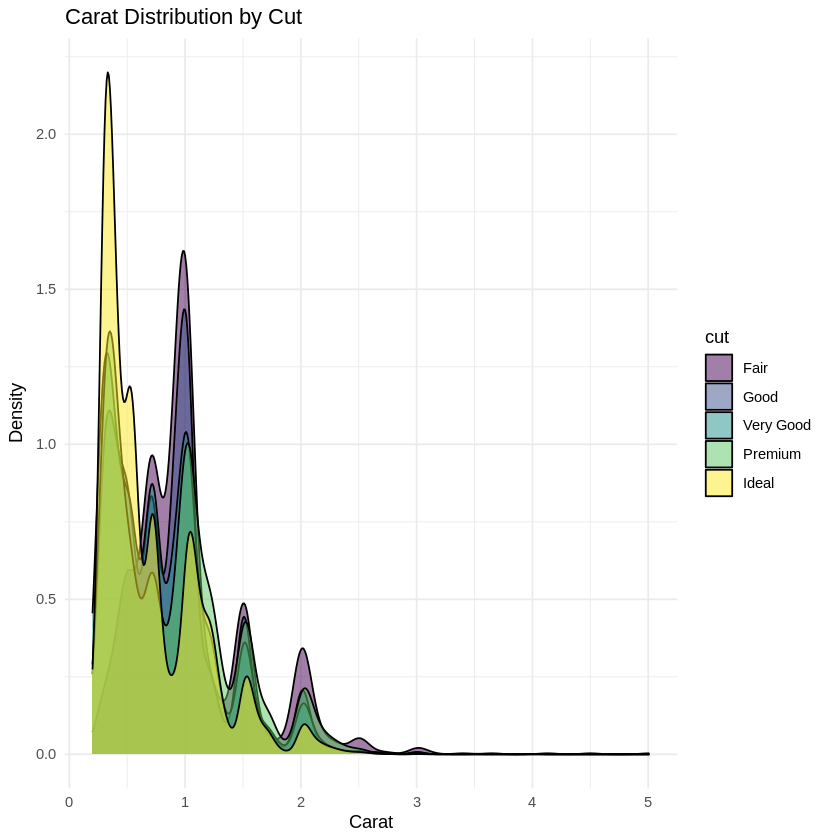

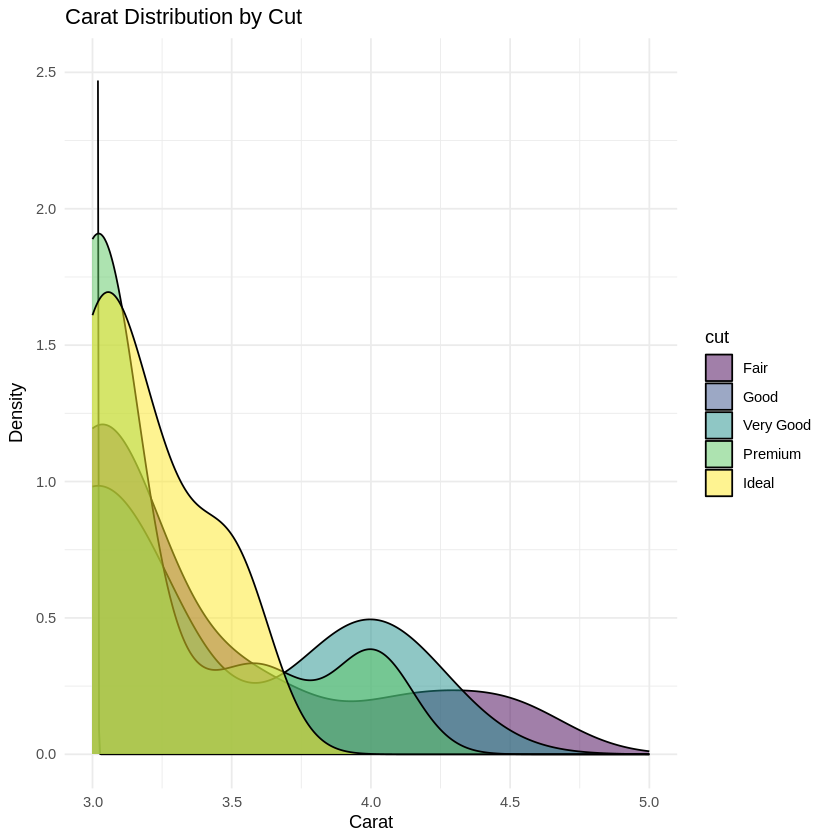

In [17]:
ggplot(diamonds, aes(x = carat, fill = cut)) +
  geom_density(alpha = 0.5, ) +
  labs(
    title = "Carat Distribution by Cut",
    x = "Carat",
    y = "Density"
  ) +
  theme_minimal()

#zoomed-in for the tail
ggplot(diamonds, aes(x = carat, fill = cut)) +
  geom_density(alpha = 0.5, ) +
  labs(
    title = "Carat Distribution by Cut",
    x = "Carat",
    y = "Density"
  ) +
  xlim(3,5) +
  ylim(0,2.5) +
  theme_minimal()

**What do you conclude?**
From the density plot created confirms what the scatterplot shows, that ideal and premium cut diamonds mainly have smaller carat sizes. While fair, good, and very good cut diamonds have heavier right tails, meaning diamonds of those cuts are also larger in carat size.

**How does this explain the paradoxical trend we found in the plot below?**
The boxplot below shows that lower-quality cuts seem to have a larger median price than those that are high-quality, which you would think to be the opposite. However, this can be explained by the fact that low-quality cuts also have higher carats which mean that they likely have a higher price.

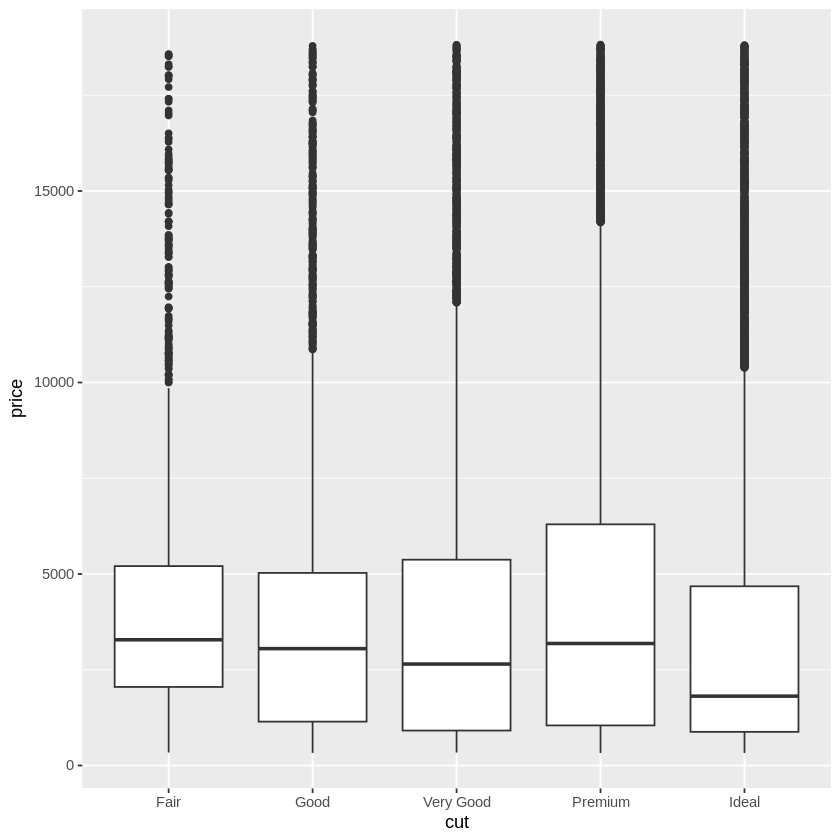

In [18]:
ggplot(data = diamonds) +
geom_boxplot(mapping = aes(x = cut, y = price))


**Analysis :** Different plots may used to analyse different aspects of data, additionally these plots cane be customized to show the relationships of different variables. For example, the boxplot may confuse some why low-quality cuts have a higher median price, however the scatterplot and density plot can show that this is because of carat size.

# **LECTURE 3**

*   What is the minimum diamond price in this dataset? See if you can find the answer in two different ways (i.e. using two different dplyr verbs)
*   How many diamonds have length at least one and a half times their width?
*   Among diamonds with colors D, E, F, G, what is the median number of carats for diamonds of each cut?

The minimum price of the diamond data set is 326 when using summarise
The minimum price of the diamond data set is 326 when using slice
The number of diamonds that have length of at least one and a half times their width is 10
The table below contains the median number of carats for diamonds of each cut among diamonds with colors D, E, F, G:
# A tibble: 5 × 2
  cut       diamonds_carats_median
  <ord>                      <dbl>
1 Fair                        0.91
2 Good                        0.72
3 Very Good                   0.7 
4 Premium                     0.71
5 Ideal                       0.52


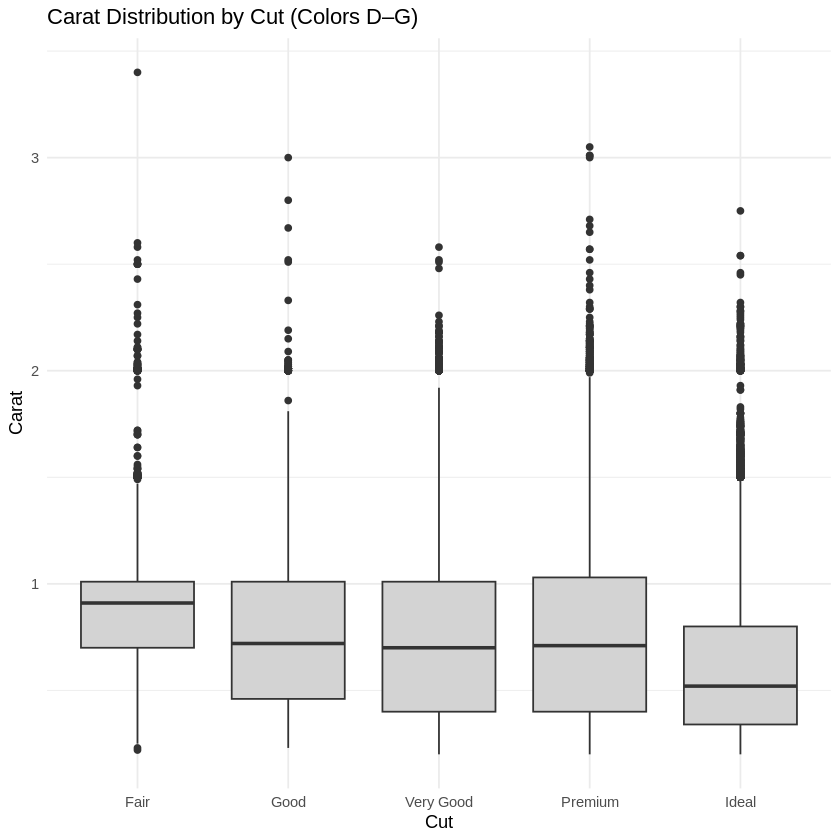

In [19]:
data("diamonds")

# What is the minimum diamond price in this dataset? See if you can find the answer in two different ways (i.e. using two different dplyr verbs)
min_price_1 <- diamonds %>%
  summarise (min_price_1 = min(price, na.rm = TRUE)) %>%
  pull(min_price_1)

cat(sprintf("The minimum price of the diamond data set is %d when using summarise\n", min_price_1))

min_price_2 <- diamonds %>%
  arrange(price) %>%
  slice(1) %>%
  pull(price)

cat(sprintf(
  "The minimum price of the diamond data set is %d when using slice\n",
  min_price_2
))


#How many diamonds have length at least one and a half times their width?

filtered_diamonds <- diamonds %>%
  filter(x >= 1.5 * y) %>%
  count(name = "n_diamonds") %>%
  pull(n_diamonds)


cat(sprintf("The number of diamonds that have length of at least one and a half times their width is %d\n", filtered_diamonds))

# Among diamonds with colors D, E, F, G, what is the median number of carats for diamonds of each cut?

diamonds_carats_median <- diamonds %>%
  filter(color %in% c("D", "E", "F", "G")) %>%
  group_by(cut) %>%
  summarise(diamonds_carats_median = median(carat, na.rm = TRUE))

cat("The table below contains the median number of carats for diamonds of each cut among diamonds with colors D, E, F, G:\n")
print(diamonds_carats_median)

## Visualization

ggplot(
  diamonds %>% filter(color %in% c("D", "E", "F", "G")),
  aes(x = cut, y = carat)
) +
  geom_boxplot(fill = "lightgray") +
  labs(
    title = "Carat Distribution by Cut (Colors D–G)",
    x = "Cut",
    y = "Carat"
  ) +
  theme_minimal()


**Analysis :** There can be multiple ways to get your desrired data. For example in the first part, two different dplyr verbs where used, however they both resulted in the same annswer. Also, logical comparisons can be used to analyze specific parts of data. For example, using filter(x >= 1.5 * y) showed me that it is rare for diamons to have a long length. Lastly, dplyr and ggplot can be used hand-in-hand, as shown it made easier to compare median and see differences between each cut for the grouped data.

# **LECTURE 4**

**Import heights2.csv**

In [ ]:
#  Import heights2.csv.
heights <- read_csv("heights.csv")
heights

In [23]:
table1
table2
table3
table4a
table4b

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


country,year,rate
<chr>,<dbl>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


**Using prose, describe how the variables and observations are organised in each of the sample tables**

To make a dataset tidy, it must follow the three rules:
1. Each variable must have its own column.
2. Each observation must have its own row.
3. Each value must have its own cell.

According to these rules, only **table 1** is a tidy data set. It's four variables (country, year, cases, population) all have their own columns. The observations all have their own rows, as it can be seen that every row is only has country and one year. Finally, each value also has its own cell.

For **table 2**, the variables cases and population share a column, while the other variables have their own column. Additionally, each observation has two rows, where the first row shows the cases for the country and year. and the second row shows the population for the country and year. Finally, each value has its own cell.

For **table 3**, the variables cases and population share a column rate that is cases/population, while the other variables have their own column. Each observation all have their own rows, as it can be seen that every row is only has country and one year. However, each value does not have its own cell, as the cases and popluation for each observation, share a cell.

**Table 4a** only has the variables country, cases, and years. However, year is split into two columns, and cases does not have its own column. So, it results in two observations being in one row. Each value does have its own cell.

Similarly, **Table 4b** only has the variables country, population, and years. However, year is split into two columns, and population does not have its own column. So, it results in two observations being in one row. Each value does have its own cell.


**Use pivot_longer() to tidy table4b in a similar fashion.**


```
table4a %>%
pivot_longer(cols = c(`1999`, `2000`), names_to = "year", values_to = "cases")
```



In [25]:
table4b %>%
  pivot_longer(cols = c(`1999`, `2000`), names_to = "year", values_to = "population")

country,year,population
<chr>,<chr>,<dbl>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


**What is the difference between the code used to tidy table4a and table4b**

The only difference is that to tidy table4b, one has to use values_to = "population" instead of values_to = "cases", as table4b contains the population variable and not the variable cases.

**Why does this code fail?**

```
table4a %>%
pivot_longer(cols = c(1999, 2000), names_to = "year", values_to = "cases")
# Error: Can't subset columns that don't exist.
# Locations 1999 and 2000 don't exist.
# There are only 3 columns.
```
The code fails because R interprets 1999 and 2000 as numbers, instead of as column names. To make the code work, 1999 and 2000 have to be enclosed in single quotation marks,i.e., cols = c(`1999`, `2000`), for R to read it as a column name.

**Tidy the simple tibble below. Do you need to make it wider or longer? What are the variables?**
```
tribble(
~pregnant, ~male, ~female,
"yes", NA, 10,
"no", 20, 12
)
```
It needs to be longer, as longer is used when the column names are not variables, and are instead values of a variable. As the variables in the tibble are pregnancy status, gender, and count, they should also be the column names. However, two of the column names are instead male and female, which are values of the gender variable, indicating pivot_longer should be used to make it tidy.

**Consider the two tibbles below. What is the key column? Without writing any code, can you predict how many rows and columns left_join(x,y) and left_join(y,x) will have?**
```
x <- tribble(
~state, ~population,
"PA", 12.8,
"TX", 28.6,
"NY", 19.5
)
y <- tribble(
~state, ~capital,
"TX", "Austin",
"CA", "Sacramento",
"NY", "New York City",
"MI", "Lansing"
```
The key column is state as it is the only column shared by both tibbles. They will both have same three columns arranged differently, left_join(x,y) will have 'state', 'population', 'capital' while left_join(y,x) will have 'state', 'capital', 'population'. For rows, left_join(x,y) will have three rows as x has three rows while left_join(y,x) will have four rows as y has four rows.

**Analysis:** There are times where datasets might not be tidy, which can make analyzing data complicated. Luckily, there are ways in R that can be used to make the dataset tidy. To make it tidy, it's important to know what to fix so that appropriate functions can be used. For example, to make table4a and table4b tidy, one cannot use pivot_wider() as it used for when observations are scattered accross different rows, however pivot_longer() is appropriate, as it used when column names are variable values, like in table4a which has column names '1999' and '2000', both of which are values of the variable year.
